In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
sales = pd.read_excel('sales.xlsx')
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [4]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
sales.set_index ('CustomerID', inplace = True)

In [7]:
#check for duplicates 
#sales [sales.duplicated()]
sales.drop_duplicates(inplace= True)

In [8]:
sales.shape

(7000, 14)

In [9]:
#Impute MntDrinks

sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']] # we are using this variables to impute in drinks because they have a corr>0.7

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

sales['MntDrinks'] = sales_products['MntDrinks'].values

In [10]:
#Input recency com a média
sales.fillna({'Recency': sales['Recency'].mean}, inplace = True)

In [11]:
#sales.isna().sum()

INFO : 6 float variables; 8 integer variables; 1 object variable

In [12]:
#recency está em object tem de passar para integer
#sales["Recency"] = sales["Recency"].astype(str).astype(float)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 11054 to 25310
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_Adherence         7000 non-null   object 
 1   Recency                7000 non-null   object 
 2   MntMeat&Fish           7000 non-null   float64
 3   MntEntries             7000 non-null   int64  
 4   MntVegan&Vegetarian    7000 non-null   float64
 5   MntDrinks              7000 non-null   float64
 6   MntDesserts            7000 non-null   float64
 7   MntAdditionalRequests  7000 non-null   float64
 8   NumOfferPurchases      7000 non-null   int64  
 9   NumAppPurchases        7000 non-null   int64  
 10  NumTakeAwayPurchases   7000 non-null   int64  
 11  NumStorePurchases      7000 non-null   int64  
 12  NumAppVisitsMonth      7000 non-null   int64  
 13  Complain               7000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 82

## Outliers

In [13]:
#sales.hist(sales['Recency'])
#sns.histplot(data = sales, x = 'Recency', color="g", bins = 10)

In [76]:
sales_NO = sales.copy()

In [77]:
sales_NO = sales_NO.drop(sales_NO[sales_NO['NumTakeAwayPurchases'] > 20].index)

## Clusters - Perspectiva preferência pela via de consumo (APP,TK AWAY, STORE)

Identify the right number of clusters

In [78]:
#Criar subset com as variáveis que vão contribuir para os clusters
sales_vc = sales_NO[[ 'NumAppPurchases','NumTakeAwayPurchases', 'NumStorePurchases',]].copy()
sales_vc

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases
CustomerID,,,
11054,13,4,13
17117,9,7,9
31751,9,5,3
12947,7,5,11
11402,4,1,3
...,...,...,...
23699,4,1,4
23255,5,1,3
5798,8,4,13


In [80]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(sales_vc)


In [81]:
# create new dataframe with scaled data
sales_vc_std = pd.DataFrame(scaled_data, columns=['NumAppPurchases','NumTakeAwayPurchases', 'NumStorePurchases'])

In [82]:
sales_vc_std.head(10)

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases
0,2.561707,0.119764,2.189861
1,1.084309,1.189779,0.966838
2,1.084309,0.476436,-0.867696
3,0.345610,0.476436,1.578350
4,-0.762439,-0.950250,-0.867696
5,-0.023740,-0.236907,-0.867696
6,0.345610,1.903122,0.661083
7,0.345610,0.119764,-0.561940
8,-1.131788,-0.950250,-0.867696
9,2.192357,-0.593579,0.661083


In [83]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(sales_vc_std)
    inertias.append(model.inertia_)

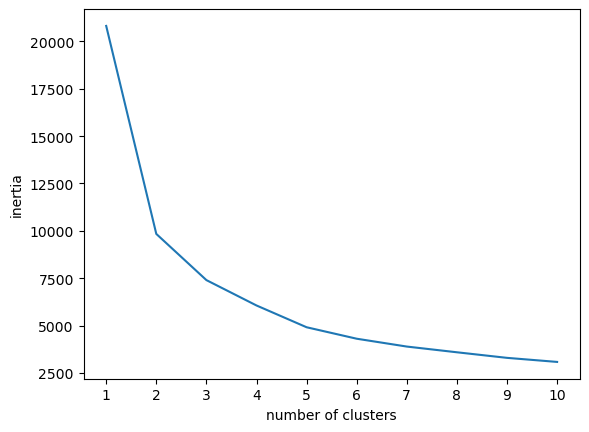

In [84]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

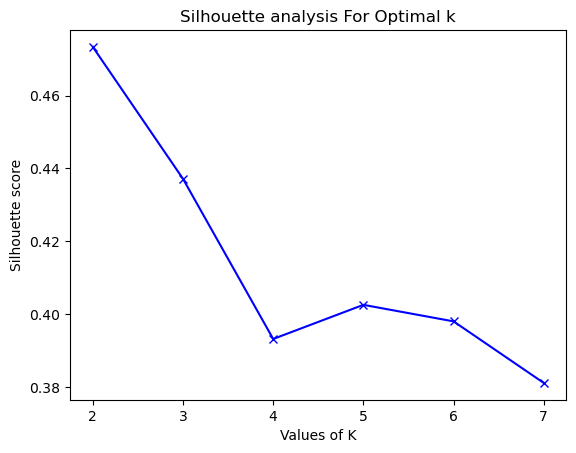

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3, 4, 5, 6, 7]
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(sales_vc_std)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(sales_vc_std, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

The optimal K with the Silhouette method is 2! 

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

Testar K= 2; 3; 4 

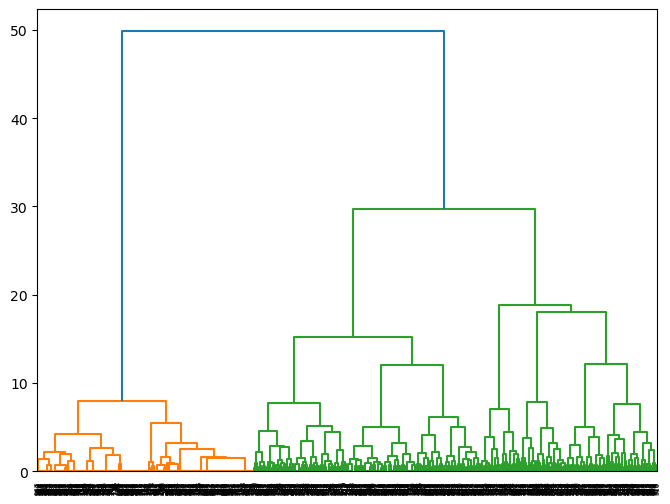

In [86]:
    from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
sales_vc_sample = sales_vc_std.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(sales_vc_sample , method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

## 2 Clusters (K=2)

In [87]:
sales_vc_k2 = sales_vc_std.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(sales_vc_k2)

In [88]:
sales_vc_k2['k_label'] = model_k2.labels_

In [89]:
sales_vc_k2.groupby(['k_label']).mean().transpose()

k_label,0,1
NumAppPurchases,-0.691082,0.690485
NumTakeAwayPurchases,-0.721725,0.721102
NumStorePurchases,-0.764807,0.764146


In [90]:
sales_vc_k2.groupby(['k_label']).describe().transpose()

k_label                               0            1
NumAppPurchases      count  3468.000000  3471.000000
                     mean     -0.691082     0.690485
                     std       0.559600     0.855923
                     min      -2.239837    -1.131788
                     25%      -1.131788    -0.023740
                     50%      -0.762439     0.714959
                     75%      -0.393089     1.453658
                     max       1.453658     2.561707
NumTakeAwayPurchases count  3468.000000  3471.000000
                     mean     -0.721725     0.721102
                     std       0.319633     0.925694
                     min      -1.306922    -0.593579
                     25%      -0.950250    -0.236907
                     50%      -0.950250     0.476436
                     75%      -0.593579     1.189779
                     max       1.189779     2.973137
NumStorePurchases    count  3468.000000  3471.000000
                     mean     -0.764807     0.764146
                     std       0.391159     0.823503
                     min      -1.784963    -1.173451
                     25%      -0.867696     0.049571
                     50%      -0.867696     0.661083
                     75%      -0.561940     1.272594
                     max       0.966838     2.189861

## 3 Clusters (K=3) 

In [91]:
sales_vc_k3 = sales_vc_std.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(sales_vc_k3)

In [92]:
sales_vc_k3['k_label'] = model_k3.labels_

In [93]:
sales_vc_k3.groupby(['k_label']).mean().transpose()

k_label,0,1,2
NumAppPurchases,1.034624,0.244918,-0.769944
NumTakeAwayPurchases,0.002461,1.437034,-0.739959
NumStorePurchases,0.535272,0.902536,-0.796999


Ordem de grandeza do clusters (n.º de individuos) : 2 < 0 < 1 

- C0 compra mais na app e na loja (grupo de clientes regulares)
- C1 é o que tem mais gentes mas o que consome menos (clientes não regulares)
- C2 compra mais no TK Away, mas o cluster que consome mais no geral (grupo de clientes regulares que previligiam o TK Away)


In [94]:
descr = sales_vc_k3.groupby(['k_label']).describe().transpose()
descr

k_label                               0            1            2
NumAppPurchases      count  2022.000000  1669.000000  3248.000000
                     mean      1.034624     0.244918    -0.769944
                     std       0.768675     0.696234     0.479420
                     min      -0.762439    -1.131788    -2.239837
                     25%       0.345610    -0.393089    -1.131788
                     50%       1.084309    -0.023740    -0.762439
                     75%       1.453658     0.714959    -0.393089
                     max       2.561707     2.561707     0.714959
NumTakeAwayPurchases count  2022.000000  1669.000000  3248.000000
                     mean      0.002461     1.437034    -0.739959
                     std       0.472468     0.754542     0.310574
                     min      -0.950250    -0.236907    -1.306922
                     25%      -0.236907     0.833107    -0.950250
                     50%      -0.236907     1.189779    -0.950250
                     75%       0.476436     1.903122    -0.593579
                     max       1.903122     2.973137     1.189779
NumStorePurchases    count  2022.000000  1669.000000  3248.000000
                     mean      0.535272     0.902536    -0.796999
                     std       0.782168     0.862120     0.376728
                     min      -1.173451    -0.867696    -1.784963
                     25%       0.049571     0.049571    -0.867696
                     50%       0.355327     0.966838    -0.867696
                     75%       0.966838     1.578350    -0.561940
                     max       2.189861     2.189861     0.966838

## 4 Clusters (K=4) --> SOLUÇÃO

In [95]:
sales_vc_k4 = sales_vc_std.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(sales_vc_k4)

In [96]:
sales_vc_k4['k_label'] = model_k4.labels_

In [97]:
sales_vc_k4.groupby(['k_label']).mean().transpose()

k_label,0,1,2,3
NumAppPurchases,0.211833,-0.878520,0.259344,1.579046
NumTakeAwayPurchases,-0.064324,-0.813902,1.605222,0.221765
NumStorePurchases,0.069817,-0.887600,0.989718,0.942299


Ordem de grandeza do clusters (n.º de individuos) : 3 < 2 < 1 < 0

- C0 (geral_avg~8)  APP e Loja está mais equilibrado e que menos consome TK Away; é o grupo que tem mais individuos (Menos regulares)
- C1 (geral_avg~19) Consome mais na APP
- C2 (geral_avg~24) consome mais na loja, é o que consome mais na loja, são clientes regulares
- C3 (geral_avg=24) consome maioritariamente TK Away (praticamente só Tk Away e nada na app e loja) grupo de clientes regulares que previligiam o TK Away, "habituais"); A mediana é =0 para a compra na APP e na Loja


In [98]:
sales_vc_k4.groupby(['k_label']).describe().transpose()

k_label                               0            1            2            3
NumAppPurchases      count  1767.000000  2765.000000  1323.000000  1084.000000
                     mean      0.211833    -0.878520     0.259344     1.579046
                     std       0.542520     0.408553     0.647654     0.606381
                     min      -1.131788    -2.239837    -1.131788    -0.023740
                     25%      -0.023740    -1.131788    -0.393089     1.084309
                     50%       0.345610    -0.762439     0.345610     1.453658
                     75%       0.714959    -0.762439     0.714959     2.192357
                     max       1.823008     0.345610     2.561707     2.561707
NumTakeAwayPurchases count  1767.000000  2765.000000  1323.000000  1084.000000
                     mean     -0.064324    -0.813902     1.605222     0.221765
                     std       0.513278     0.230956     0.726581     0.549585
                     min      -0.950250    -1.306922     0.119764    -0.593579
                     25%      -0.593579    -0.950250     1.189779    -0.236907
                     50%      -0.236907    -0.950250     1.546451     0.119764
                     75%       0.119764    -0.593579     2.259794     0.476436
                     max       1.189779     0.476436     2.973137     2.259794
NumStorePurchases    count  1767.000000  2765.000000  1323.000000  1084.000000
                     mean      0.069817    -0.887600     0.989718     0.942299
                     std       0.621185     0.279415     0.852851     0.765589
                     min      -1.173451    -1.784963    -0.561940    -0.867696
                     25%      -0.561940    -1.173451     0.355327     0.355327
                     50%       0.049571    -0.867696     1.272594     0.966838
                     75%       0.355327    -0.867696     1.578350     1.578350
                     max       2.189861     0.049571     2.189861     2.189861

## Visualização

HISTOGRAMAS

In [99]:
cluster0 = sales_vc_k4[sales_vc_k4.k_label==0]
cluster1 = sales_vc_k4[sales_vc_k4.k_label==1]
cluster2 = sales_vc_k4[sales_vc_k4.k_label==2]
cluster3 = sales_vc_k4[sales_vc_k4.k_label==3]

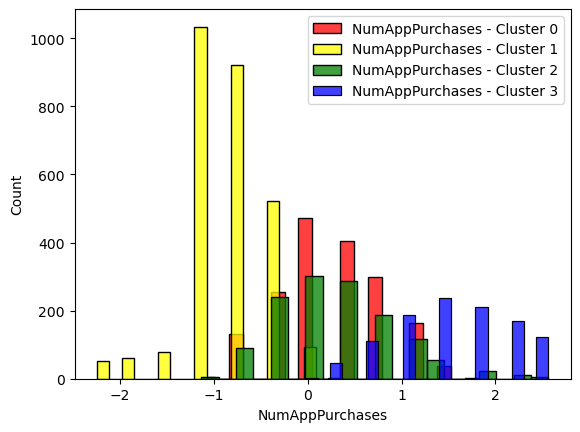

In [100]:
sns.histplot(cluster0['NumAppPurchases'],color='red',label='NumAppPurchases - Cluster 0', bins = 20)
sns.histplot(cluster1['NumAppPurchases'],color='yellow',label='NumAppPurchases - Cluster 1', bins = 20)
sns.histplot(cluster2['NumAppPurchases'],color='green',label='NumAppPurchases - Cluster 2', bins = 20)
sns.histplot(cluster3['NumAppPurchases'],color='blue',label='NumAppPurchases - Cluster 3', bins = 20)
plt.legend()

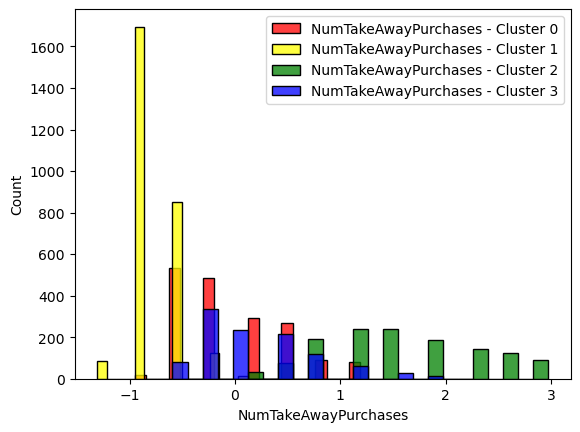

In [101]:
sns.histplot(cluster0['NumTakeAwayPurchases'],color='red',label='NumTakeAwayPurchases - Cluster 0', bins = 20)
sns.histplot(cluster1['NumTakeAwayPurchases'],color='yellow',label='NumTakeAwayPurchases - Cluster 1', bins = 20)
sns.histplot(cluster2['NumTakeAwayPurchases'],color='green',label='NumTakeAwayPurchases - Cluster 2', bins = 20)
sns.histplot(cluster3['NumTakeAwayPurchases'],color='blue',label='NumTakeAwayPurchases - Cluster 3', bins = 20)
plt.legend()

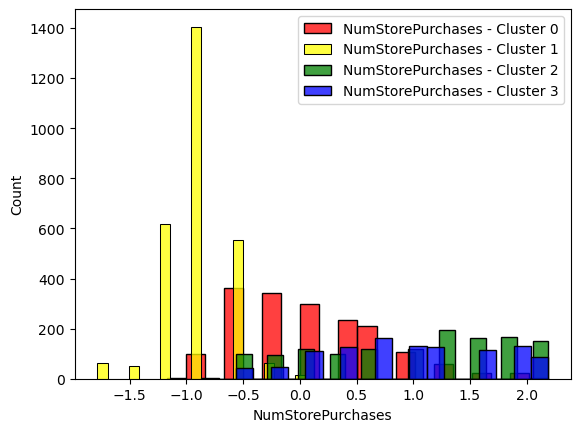

In [102]:
sns.histplot(cluster0['NumStorePurchases'],color='red',label='NumStorePurchases - Cluster 0', bins = 20)
sns.histplot(cluster1['NumStorePurchases'],color='yellow',label='NumStorePurchases - Cluster 1', bins = 20)
sns.histplot(cluster2['NumStorePurchases'],color='green',label='NumStorePurchases - Cluster 2', bins = 20)
sns.histplot(cluster3['NumStorePurchases'],color='blue',label='NumStorePurchases - Cluster 3', bins = 20)
plt.legend()

SCATTER PLOT

In [103]:
centroids = model_k4.cluster_centers_
centroids

array([[ 0.21183293, -0.06432421,  0.06981656],
       [-0.87851994, -0.81390248, -0.8876002 ],
       [ 0.25934447,  1.60522186,  0.9897179 ],
       [ 1.57904623,  0.22176451,  0.9422988 ]])

In [104]:
sales_vc_std.columns

Index(['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases'], dtype='object')

In [105]:
centroid_0_APP = centroids[0,0]
centroid_1_APP = centroids[1,0]
centroid_2_APP = centroids[2,0]
centroid_3_APP = centroids[3,0]
centroid_0_STORE = centroids[0,1]
centroid_1_STORE = centroids[1,1]
centroid_2_STORE = centroids[2,1]
centroid_3_STORE = centroids[3,1]
centroid_0_TKAWAY = centroids[0,2]
centroid_1_TKAWAY = centroids[1,2]
centroid_2_TKAWAY = centroids[2,2]
centroid_3_TKAWAY = centroids[3,2]

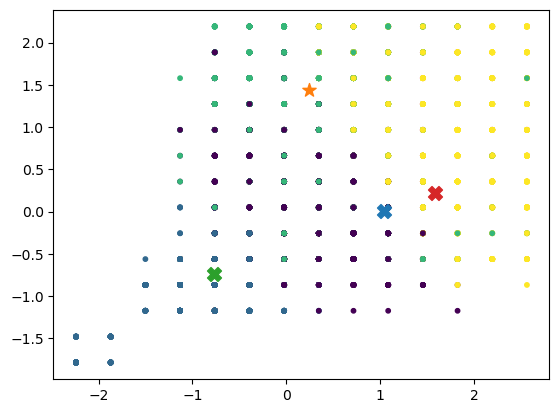

In [123]:
plt.scatter(sales_vc_k4.NumAppPurchases, sales_vc_k4.NumStorePurchases,
            c=sales_vc_k4.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_STORE, marker='X', s=100)#AZUL
plt.scatter(centroid_1_APP, centroid_1_STORE, marker='*', s=100)#LARANJA
plt.scatter(centroid_2_APP, centroid_2_STORE, marker='X', s=100)#VERDE
plt.scatter(centroid_3_APP, centroid_3_STORE, marker='X', s=100)#VERMELHO

plt.show()

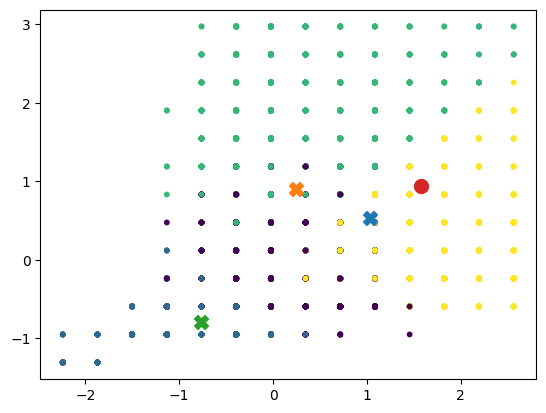

In [124]:
plt.scatter(sales_vc_k4.NumAppPurchases, sales_vc_k4.NumTakeAwayPurchases,
            c=sales_vc_k4.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_TKAWAY, marker='X', s=100)
plt.scatter(centroid_1_APP, centroid_1_TKAWAY, marker='X', s=100)
plt.scatter(centroid_2_APP, centroid_2_TKAWAY, marker='X', s=100)
plt.scatter(centroid_3_APP, centroid_3_TKAWAY, marker='o', s=100)

plt.show()

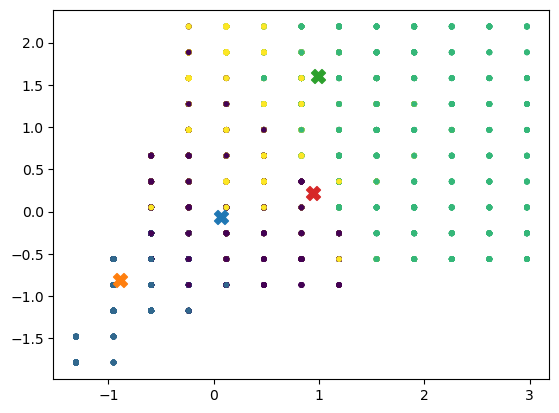

In [108]:
plt.scatter(sales_vc_k4.NumTakeAwayPurchases, sales_vc_k4.NumStorePurchases,
            c=sales_vc_k4.k_label, s=10)

plt.scatter(centroid_0_TKAWAY, centroid_0_STORE, marker='X', s=100)
plt.scatter(centroid_1_TKAWAY, centroid_1_STORE, marker='X', s=100)
plt.scatter(centroid_2_TKAWAY, centroid_2_STORE, marker='X', s=100)
plt.scatter(centroid_3_TKAWAY, centroid_3_STORE, marker='X', s=100)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

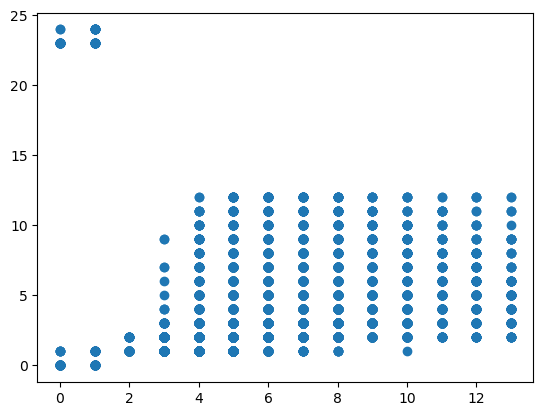

In [109]:
plt.scatter(sales["NumAppPurchases"], sales["NumTakeAwayPurchases"])
plt.show

In [110]:
centroids = model_k2.cluster_centers_
centroids

array([[-0.69108223, -0.72172549, -0.76480731],
       [ 0.69048493,  0.7211017 ,  0.76414628]])

In [111]:
centroid_0_APP = centroids[0,0]
centroid_1_APP = centroids[1,0]
centroid_0_STORE = centroids[0,1]
centroid_1_STORE = centroids[1,1]
centroid_0_TKAWAY = centroids[0,2]
centroid_1_TKAWAY = centroids[1,2]

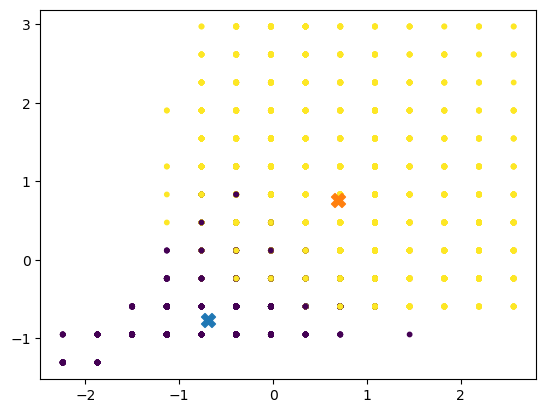

In [112]:
plt.scatter(sales_vc_k2.NumAppPurchases, sales_vc_k2.NumTakeAwayPurchases,
            c=sales_vc_k2.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_TKAWAY, marker='X', s=100)
plt.scatter(centroid_1_APP, centroid_1_TKAWAY, marker='X', s=100)

plt.show()

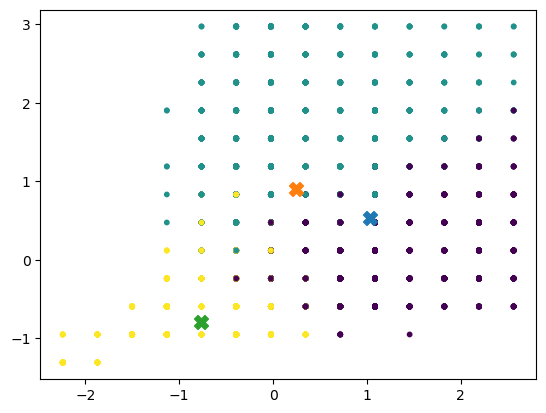

In [113]:
centroids = model_k3.cluster_centers_
centroids

centroid_0_APP = centroids[0,0]
centroid_1_APP = centroids[1,0]
centroid_2_APP = centroids[2,0]
centroid_0_STORE = centroids[0,1]
centroid_1_STORE = centroids[1,1]
centroid_2_STORE = centroids[2,1]
centroid_0_TKAWAY = centroids[0,2]
centroid_1_TKAWAY = centroids[1,2]
centroid_2_TKAWAY = centroids[2,2]



plt.scatter(sales_vc_k3.NumAppPurchases, sales_vc_k3.NumTakeAwayPurchases,
            c=sales_vc_k3.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_TKAWAY, marker='X', s=100)
plt.scatter(centroid_1_APP, centroid_1_TKAWAY, marker='X', s=100)
plt.scatter(centroid_2_APP, centroid_2_TKAWAY, marker='X', s=100)

plt.show()

<div class="alert alert-block alert-info">
    
<a id='stats_num'></a>

### DBSCAN clustering 
    
</div>

Ran the code of this site: https://www.reneshbedre.com/blog/dbscan-python.html?utm_content=cmp-true

In [150]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 20).fit(sales_vc_std)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(sales_vc_std)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

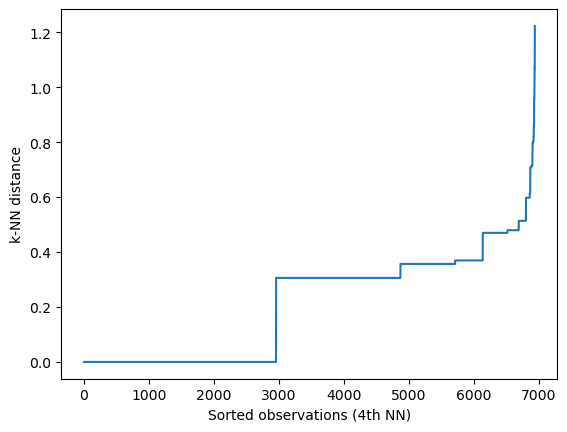

In [152]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 19]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()


- Identifying the exact knee point could be difficult visually. In the below plot, the knee point can occur at any point between 1 to 2 i.e. the points below knee point belong to a cluster, and points above the knee point are noise or outliers (noise points will have higher kNN distance). You should run DBSCAN based on different values of ε (between 1 and 2) to find the best ε that gives the best clustering.

- Additionally, to get an estimate of knee point, you can use the KneeLocator() function from the kneed package.

In [100]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [153]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

1.0714574598551223


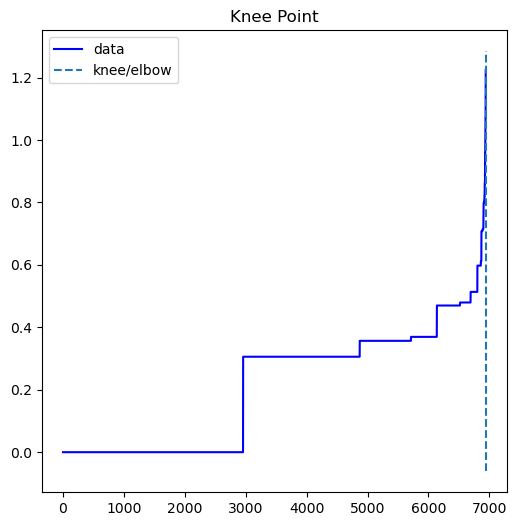

In [154]:
#distance plot
kneedle.plot_knee()
plt.show()

In [155]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 1.0714574598551223, min_samples = 2).fit(sales_vc_std)

In [156]:
# get cluster labels
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
# check unique clusters
set(clusters.labels_)

{0}

In [158]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 6939})

Visualization of DBSCAN clustering

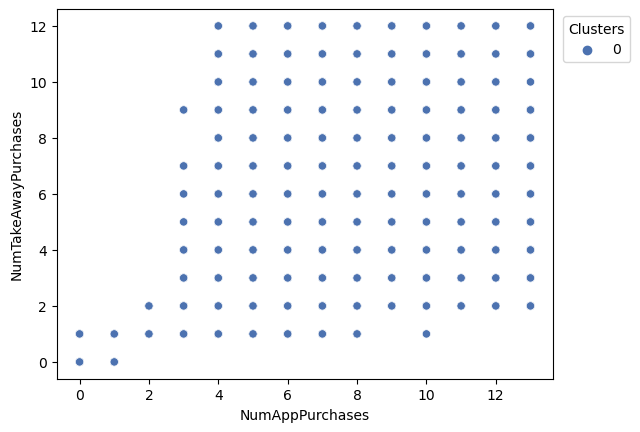

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = sales_vc, x = "NumAppPurchases", y = "NumTakeAwayPurchases", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

## ran the code of this site: https://www.section.io/engineering-education/dbscan-clustering-in-python/

In [118]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(sales_vc) # fitting the data to the object
distances,indices=nbrs.kneighbors(sales_vc) # finding the nearest neighbours

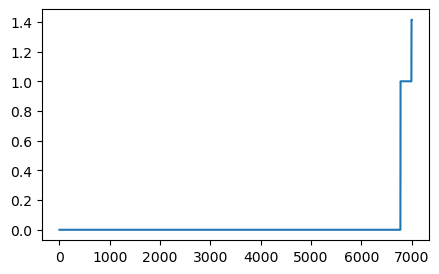

In [119]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot


<div class="alert alert-block alert-info">
    
<a id='stats_num'></a>

### Fuzzy clustering 
    
</div>

In [93]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=8d97763ae1f14d2bd7ae82fd6d9b9378bdc882f9500212e4963caec710d16177
  Stored in directory: /Users/jp/Library/Caches/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [94]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz